In [7]:
import pandas as pd
from PIL import Image
from util import *

In [6]:
adult = pd.read_parquet('data/formatted_data.parquet')
adult.drop(columns=['fnlwgt', 'education-num'], inplace=True) # dropping these columns
train = adult[adult['set'] == 'train'].drop(columns=['set'])
test = adult[adult['set'] == 'test'].drop(columns=['set'])

# Methods

## Preprocessing

The following preprocessing steps were applied identically before logistic rergression and MLP:

1. Removed 'fnlwgt' and 'education-num'
2. Limited the number of unqiue values per categorical column. This Was part of the parameter serach. It changes throughout the experiment
3. Down sample labels. >50k was resmapled to have the same number of observations as <=50k
4. Categorical features were one one-hot encoded and continous features were normlaized to mean 0 and std 1

## Logistic Regression

Used the following static hyperparameters:
1. solver = 'saga'
2. max_iter = 300

Performed a *random search* with n_iter=30. Meaning 30 random samples of the hyperparameters were used for each candidate. Used the following parameter distributions:
1. C = np.logspace(-4, 4, 9)
2. penalty = ['elasticnet', 'l1', 'l2', 'none']
3. l1_ratio = np.linspace(0, 1, 11) (only used when penelty is elasticnet)

Each candidate was fit with 4 fold cross validation with the folowing metrics:
1. Accuracy
2. Precision
3. Recall
4. F1
5. ROC

The best estimator was chosen based on the highest avergae validation ROC across folds.

## Multi-Layer Classifier (MLP)

Used the following static hyperparameters:
1. max_iter = 300
2. activation = relu
3. solver = 'adam'
4. learning_rate = adaptive

Performed a *grid search* using the following hyperparameters:
1. hidden_layer_sizes: [(64, 32, 16), (100,)] (Three layers of sizes 64, 32, 16 OR one layer of size 100)
2. alpha = [0.0001, 0.05]


(Same as logistic Regression) Each candidate was fit with 4 fold cross validation with the folowing metrics:
1. Accuracy
2. Precision
3. Recall
4. F1
5. ROC

The best estimator was chosen based on the highest avergae validation ROC across folds.

# Results

## Logistic Regression

In [5]:
import pickle
from util import *
import pandas as pd


# Params 
bestEst = pickle.load(open('data/logistic_results.pkl', 'rb')).searchObj.iloc[-1].best_estimator_
bestEst

LogisticRegression(C=10.0, l1_ratio=1.0, max_iter=300, solver='saga')

In [10]:
# Test metrics of the best model
pickle.load(open('data/logistic_results.pkl', 'rb')).testMetrics.iloc[-1]

{'accuracy': 0.8052330937903077,
 'precision': 0.5580595217615689,
 'recall': 0.843473738949558,
 'f1': 0.6717051454601926,
 'roc_auc': 0.9040550226753742}

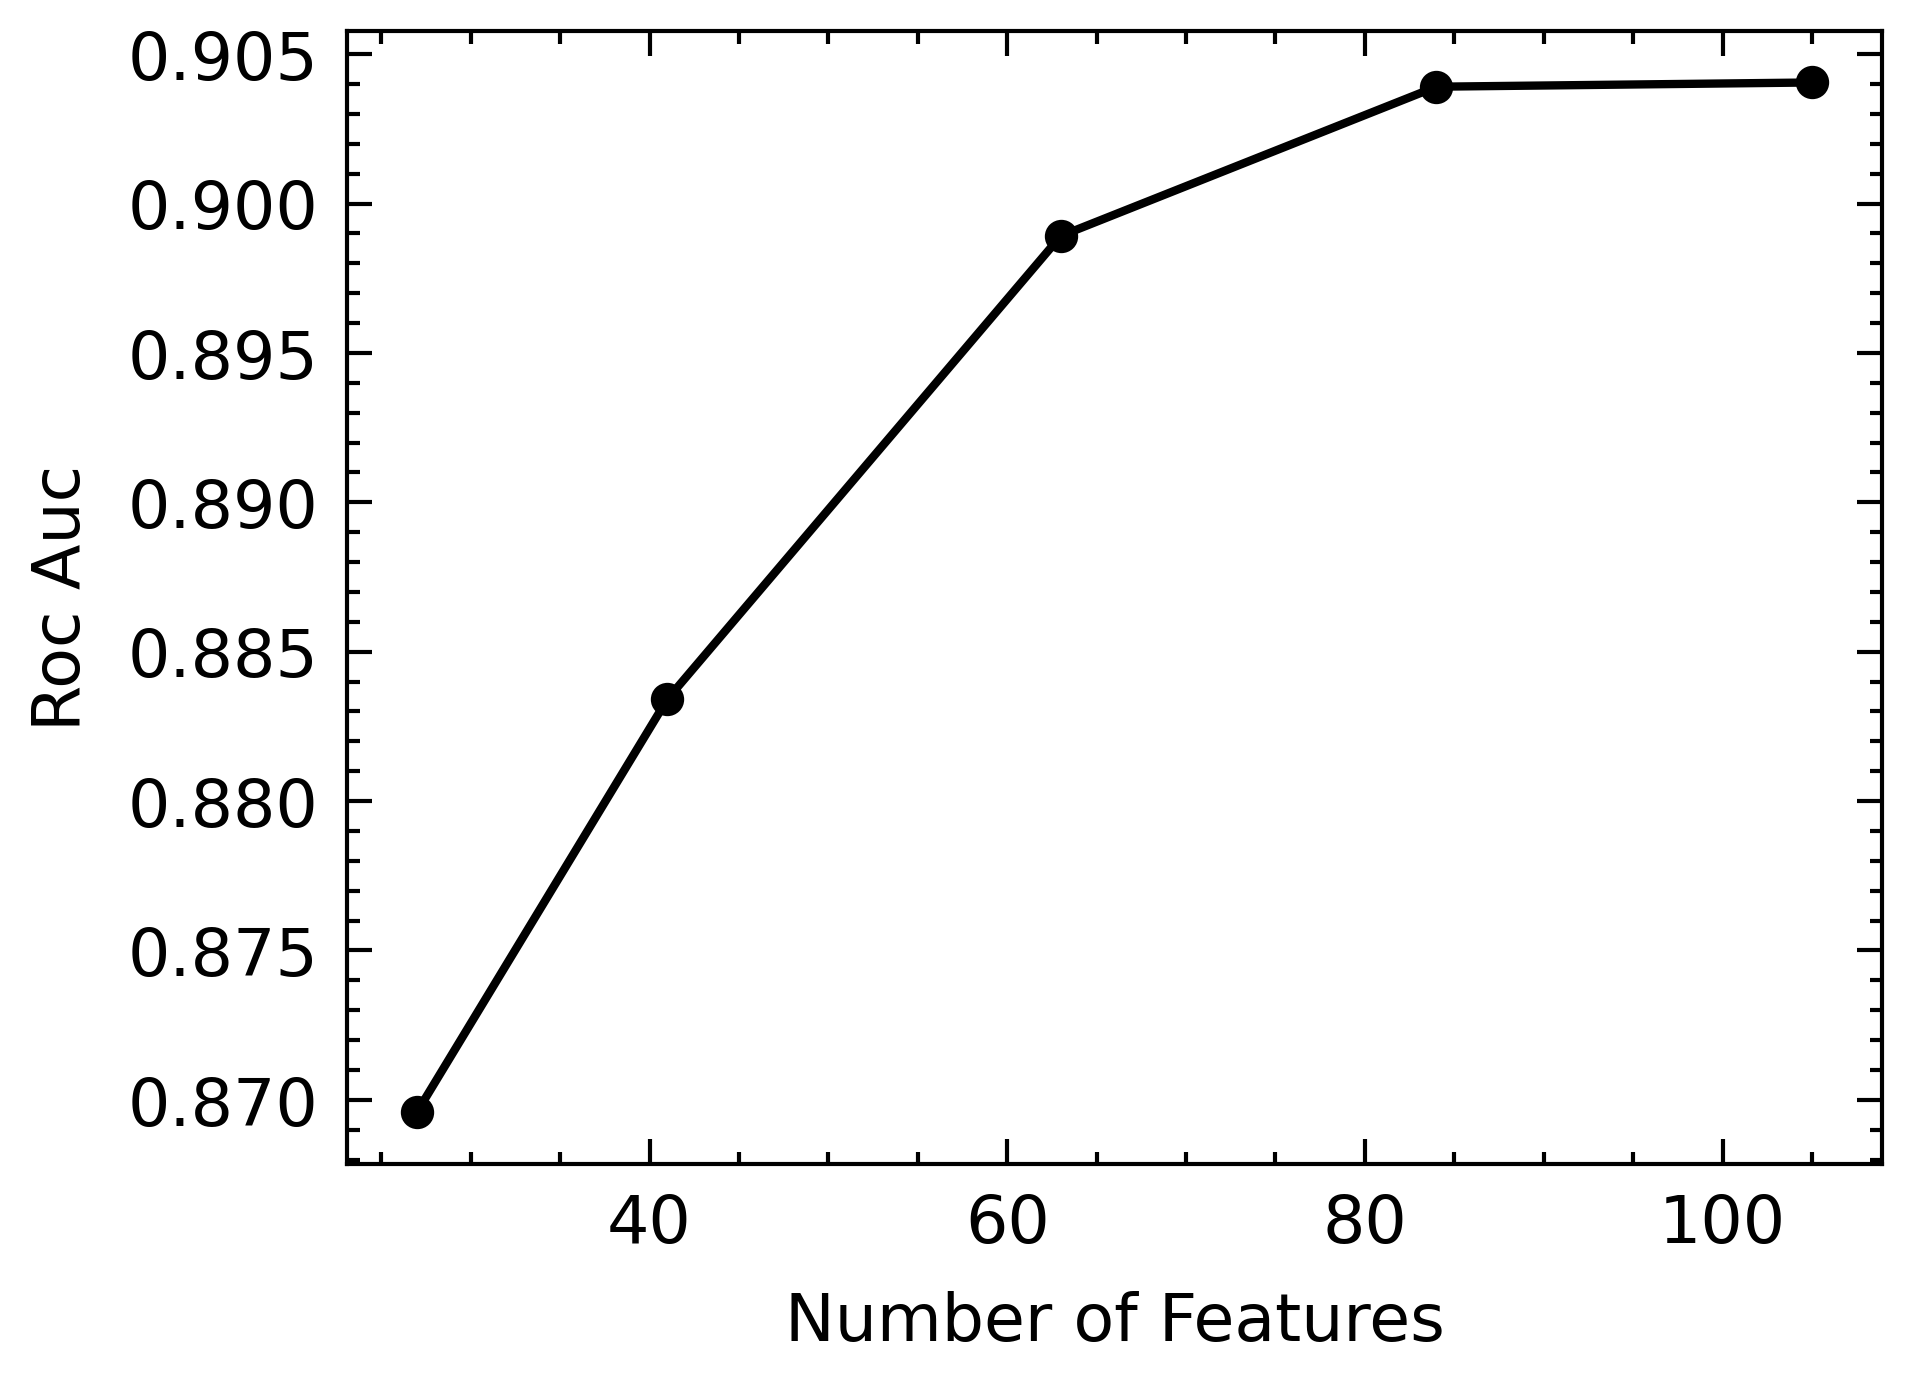

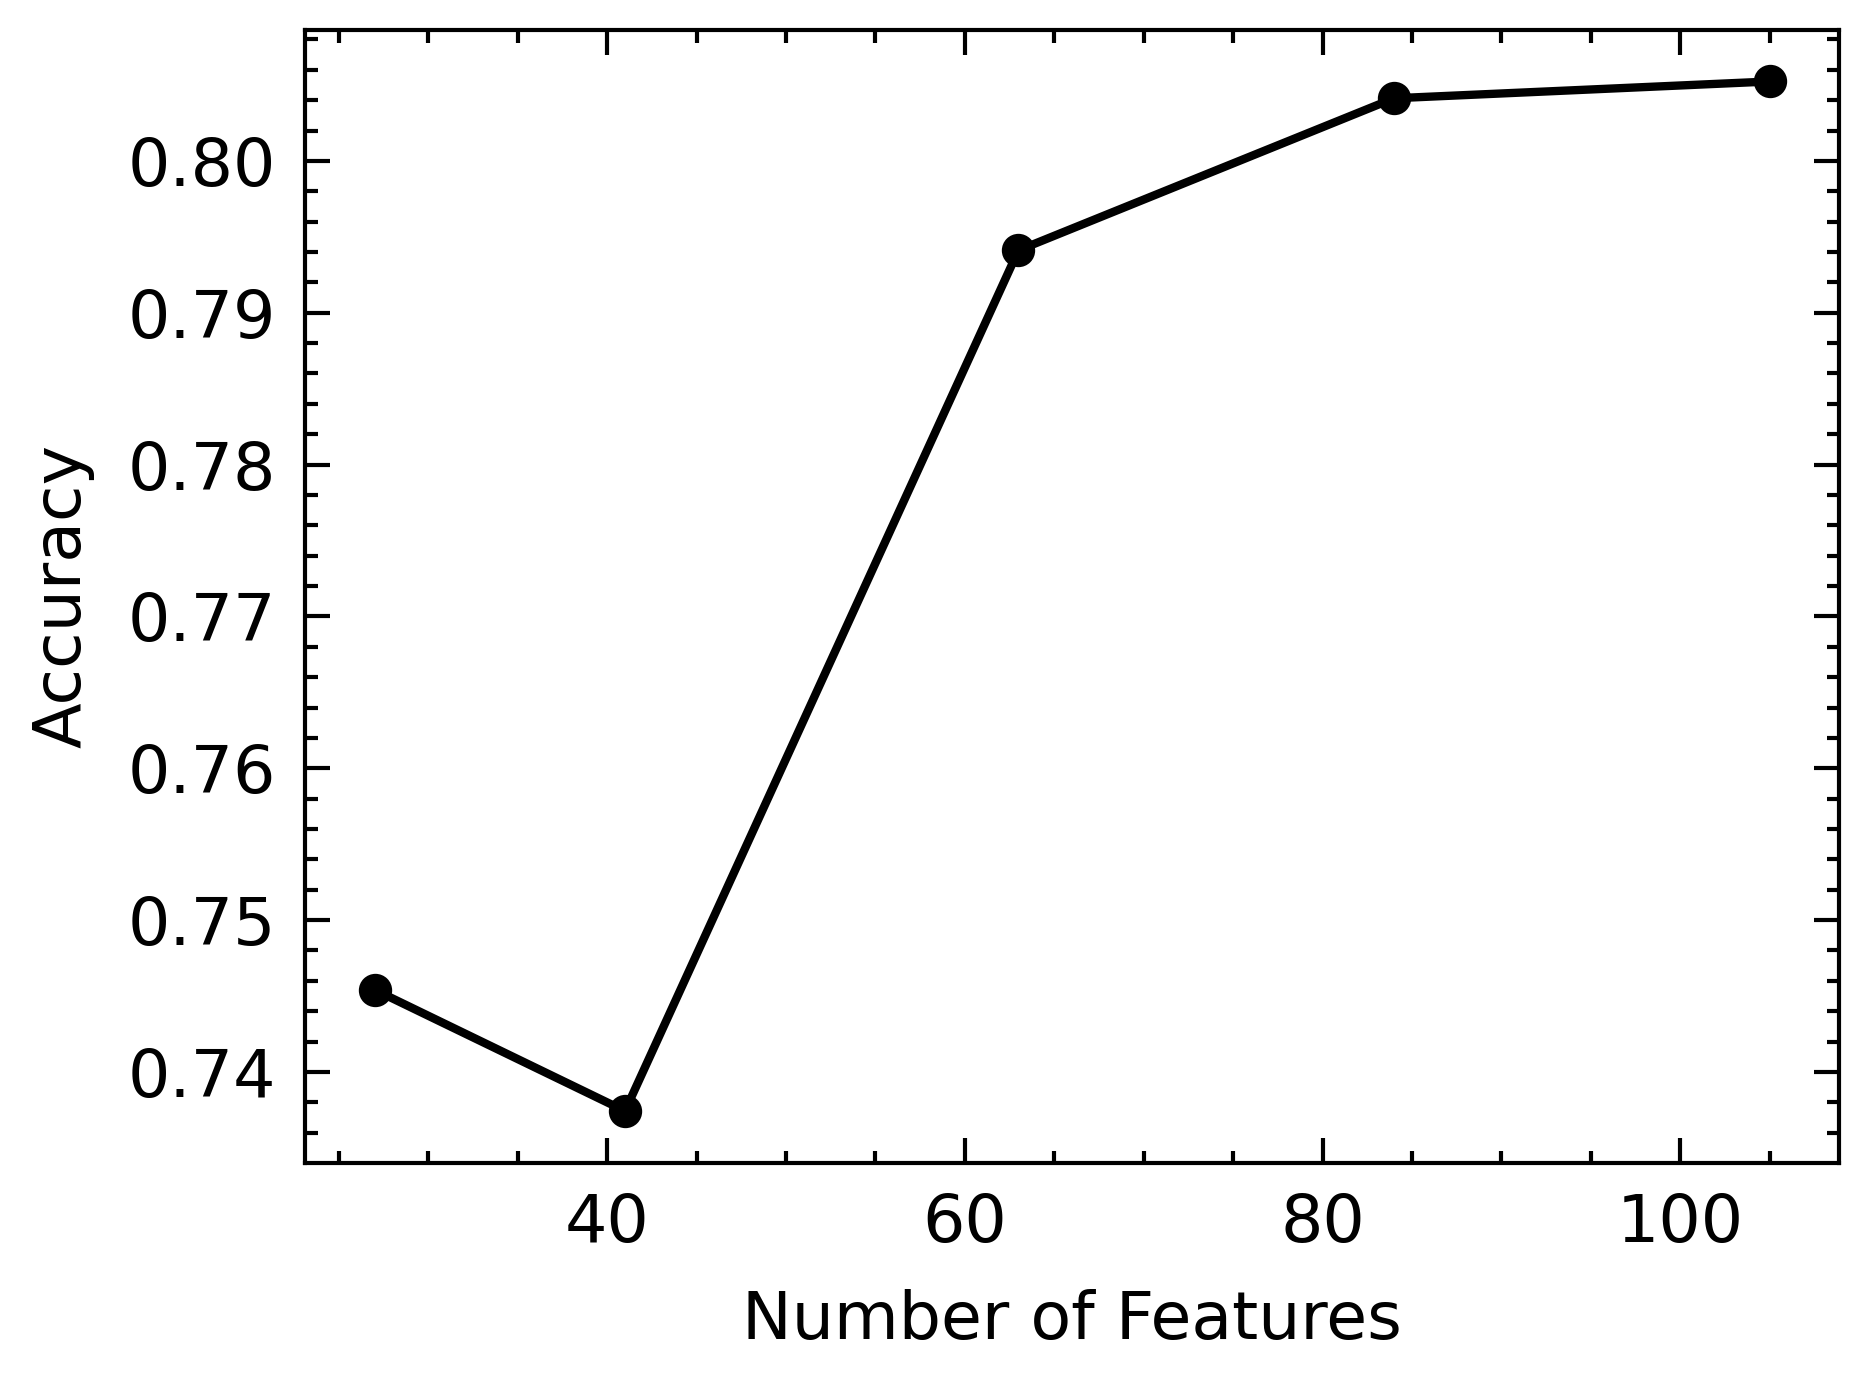

In [10]:
display(Image.open('figures/LogisticRegression/nDimsVsRoc Auc.png'))
display(Image.open('figures/LogisticRegression/nDimsVsAccuracy.png'))

The metrics follow this trend, where the metric increases as the number of features increases (caused by controlling the max number of unique vals per categorical feature)

The best model used the maximum number of features and had the following hyperparameters:
1. C = 10
2. regularization = None
3. l1_ratio = None (Only applies to elasticnet)

Here are the training and testing consusion matraces for the best estimator:

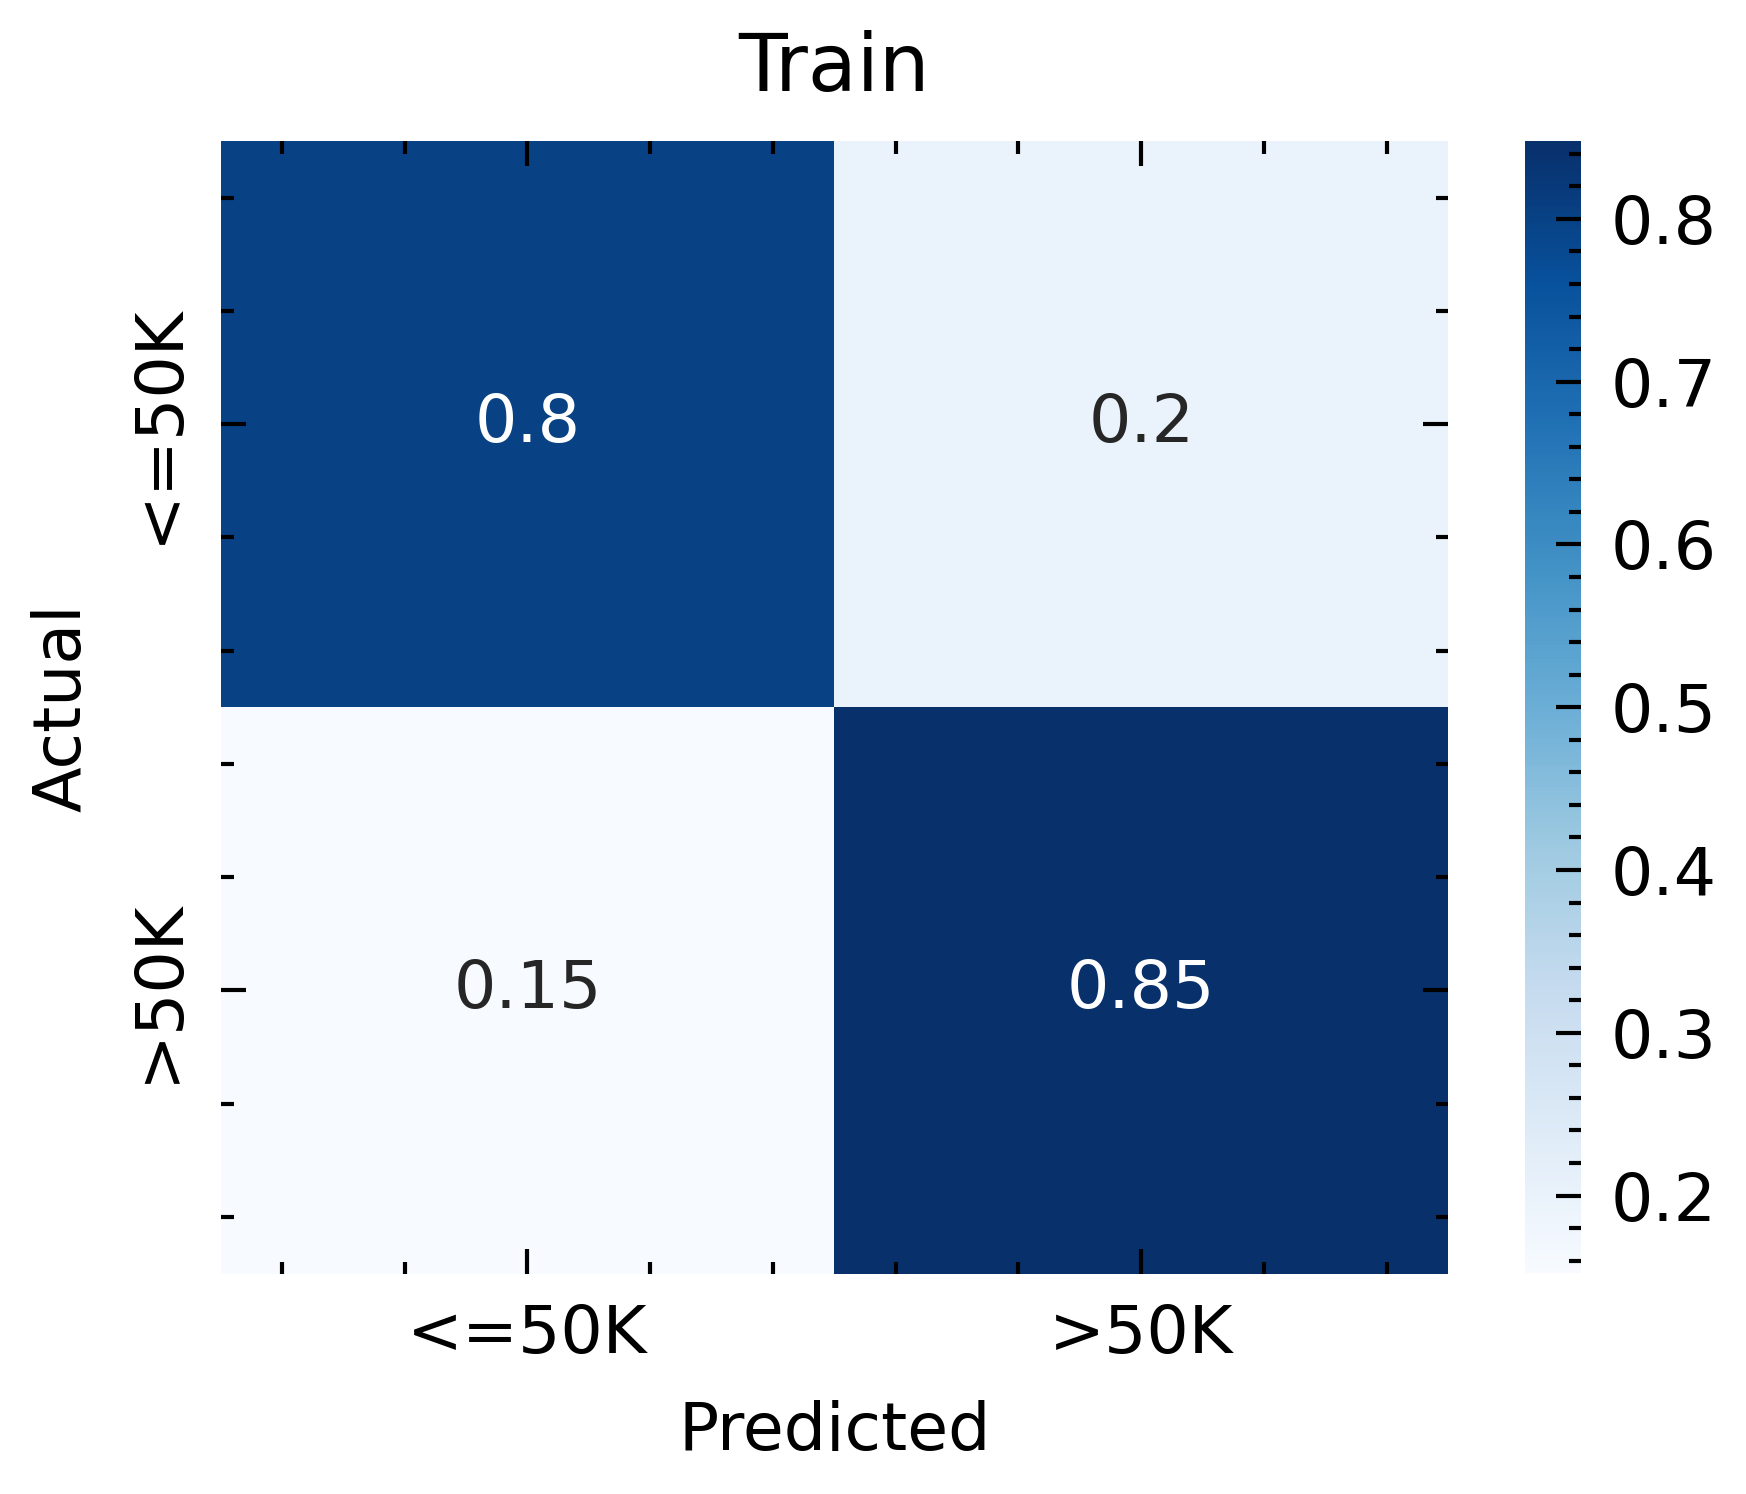

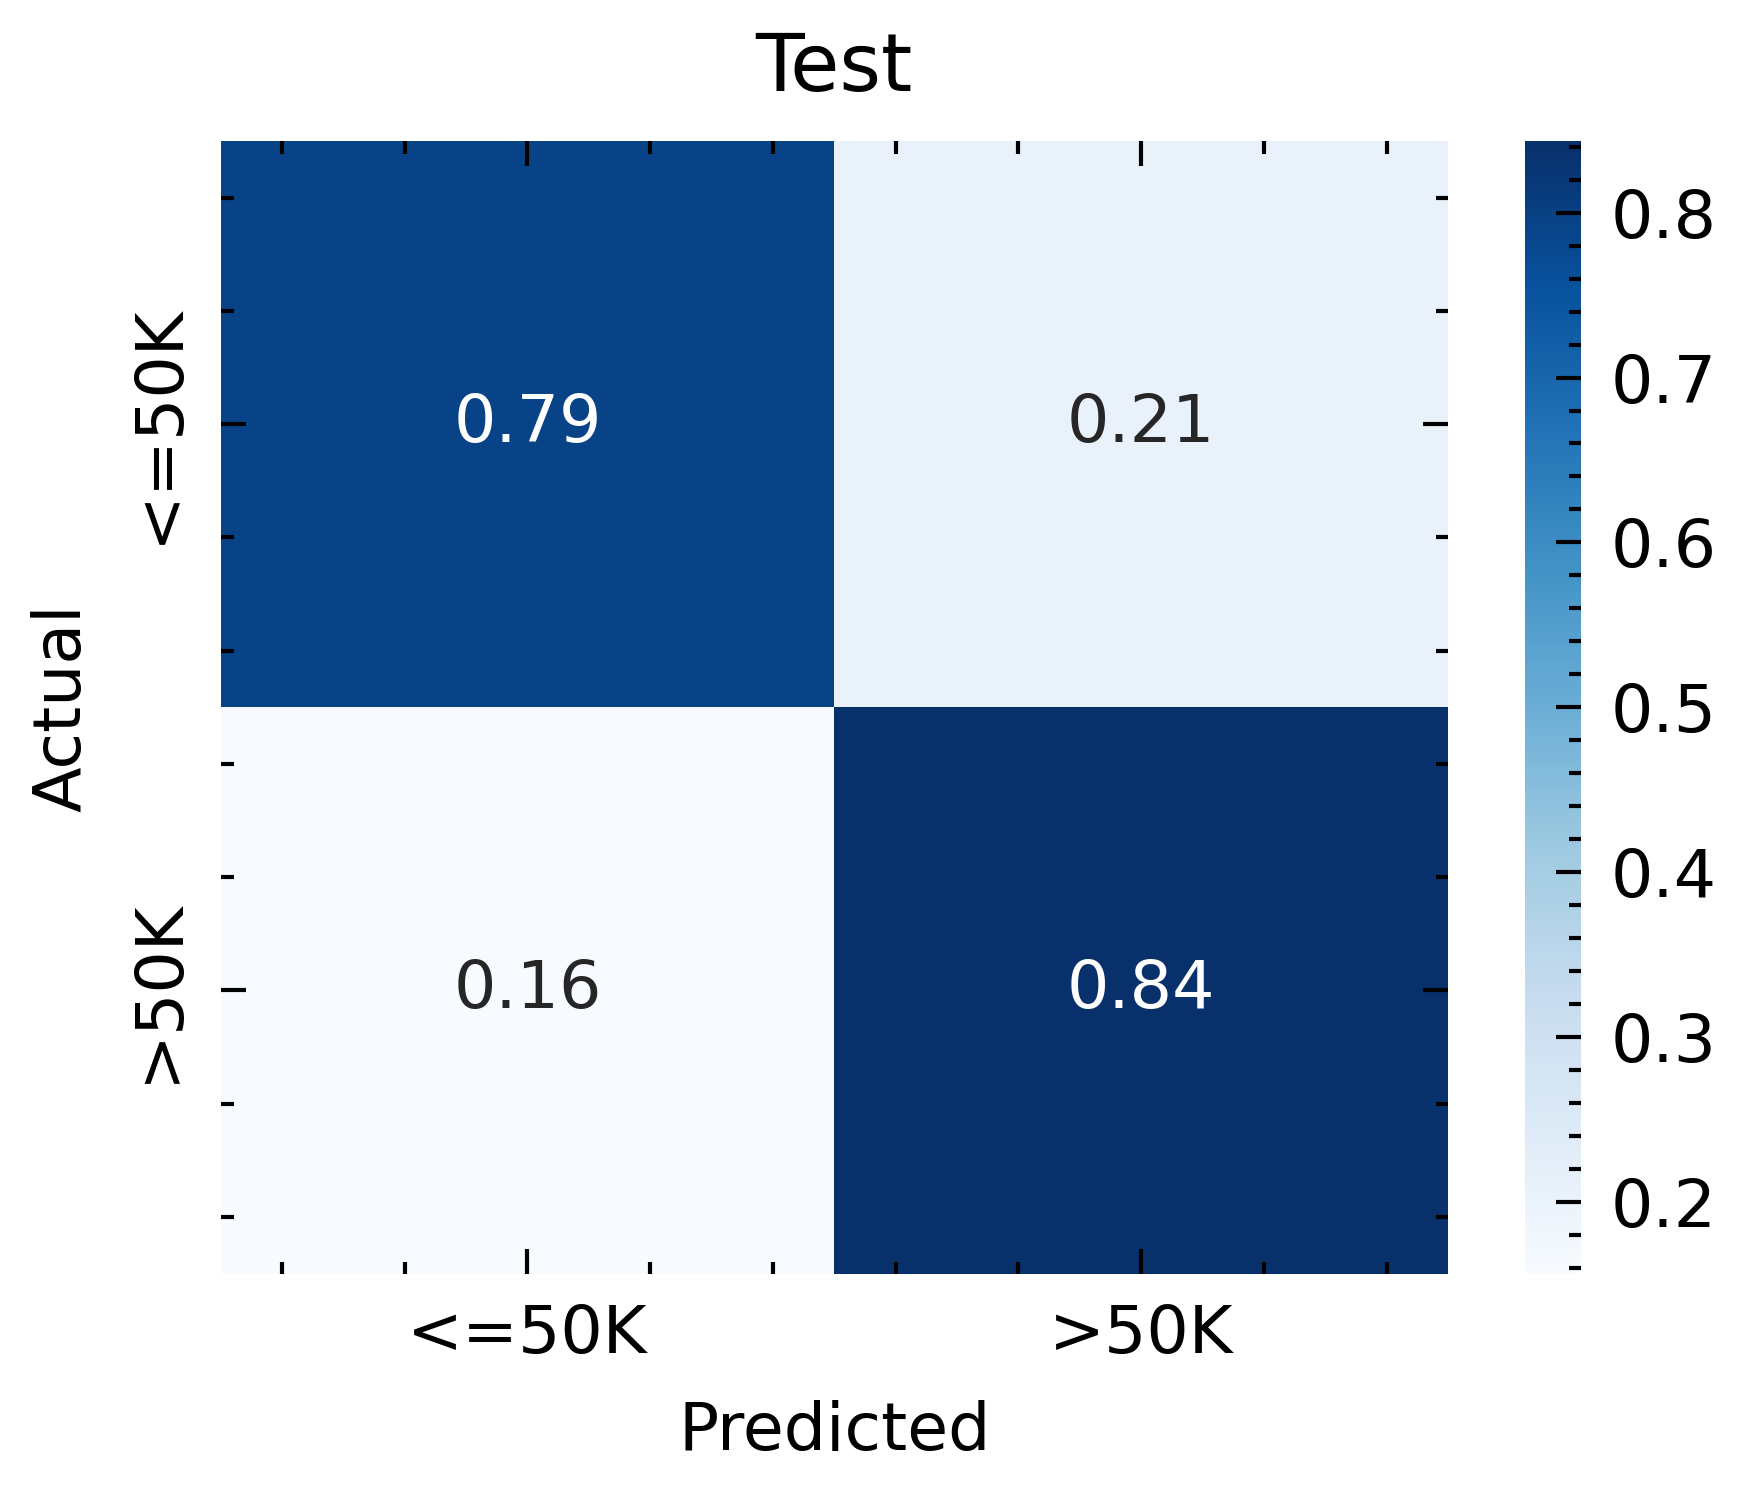

In [12]:
display(Image.open('figures/LogisticRegression/TrainConfusionMatrix.png'))
display(Image.open('figures/LogisticRegression/TestConfusionMatrix.png'))

A Table of the parameter search for the best set of features (all of them in this case):

In [14]:
stats = pd.read_pickle('data/logistic_stats.pkl')
stats

mean_test_recall  mean_test_accuracy  \
param_C    param_penalty param_l1_ratio                                         
0.0001     elasticnet    0.6                     0.750000            0.500064   
           l1            0.1                     0.500000            0.500064   
           l2            0.8                     0.818007            0.769672   
           none          0.2                     0.845811            0.822535   
0.0010     l1            0.3                     0.848998            0.760553   
                         0.6                     0.848998            0.760681   
           l2            1.0                     0.833056            0.784147   
0.0100     elasticnet    0.4                     0.847214            0.800854   
                         0.6                     0.846066            0.799770   
                         0.7                     0.844663            0.798495   
           l1            0.0                     0.846831            0.797347   
           l2            0.0                     0.848743            0.809845   
           none          0.5                     0.845811            0.822535   
0.1000     l1            0.7                     0.844280            0.820813   
           none          0.8                     0.845811            0.822535   
1.0000     none          0.8                     0.845811            0.822535   
10.0000    elasticnet    0.8                     0.845683            0.822280   
           l1            0.6                     0.845811            0.822344   
           l2            0.6                     0.845556            0.822216   
                         0.7                     0.845556            0.822216   
                         1.0                     0.845556            0.822216   
           none          0.7                     0.845811            0.822535   
100.0000   none          0.4                     0.845811            0.822535   
                         0.8                     0.845811            0.822535   
                         0.9                     0.845811            0.822535   
1000.0000  elasticnet    1.0                     0.845683            0.822471   
10000.0000 elasticnet    0.4                     0.845811            0.822535   
           l1            1.0                     0.845811            0.822535   
           l2            0.2                     0.845811            0.822535   
                         0.8                     0.845811            0.822535   

                                         mean_test_f1  mean_test_precision  \
param_C    param_penalty param_l1_ratio                                      
0.0001     elasticnet    0.6                 0.500028             0.375032   
           l1            0.1                 0.333362             0.250032   
           l2            0.8                 0.780249             0.745891   
           none          0.2                 0.826516             0.808238   
0.0010     l1            0.3                 0.780000             0.721391   
                         0.6                 0.780091             0.721548   
           l2            1.0                 0.794166             0.758848   
0.0100     elasticnet    0.4                 0.809622             0.775314   
                         0.6                 0.808570             0.774335   
                         0.7                 0.807336             0.773237   
           l1            0.0                 0.806883             0.770567   
           l2            0.0                 0.816912             0.787532   
           none          0.5                 0.826516             0.808238   
0.1000     l1            0.7                 0.824865             0.806557   
           none          0.8                 0.826516             0.808238   
1.0000     none          0.8                 0.826516             0.808238   
10.0000    elasticnet    0.8                

## Multi-Layer Classifier (MLP)

In [19]:
import pickle
from util import *
import pandas as pd

pickle.load(open('data/MLP_results.pkl', 'rb')).searchObj.iloc[-2].best_params_

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [20]:
pickle.load(open('data/MLP_results.pkl', 'rb')).testMetrics.iloc[-2]

{'accuracy': 0.8068300472943922,
 'precision': 0.5597816817329012,
 'recall': 0.8533541341653667,
 'f1': 0.6760737460088577,
 'roc_auc': 0.90407821137936}

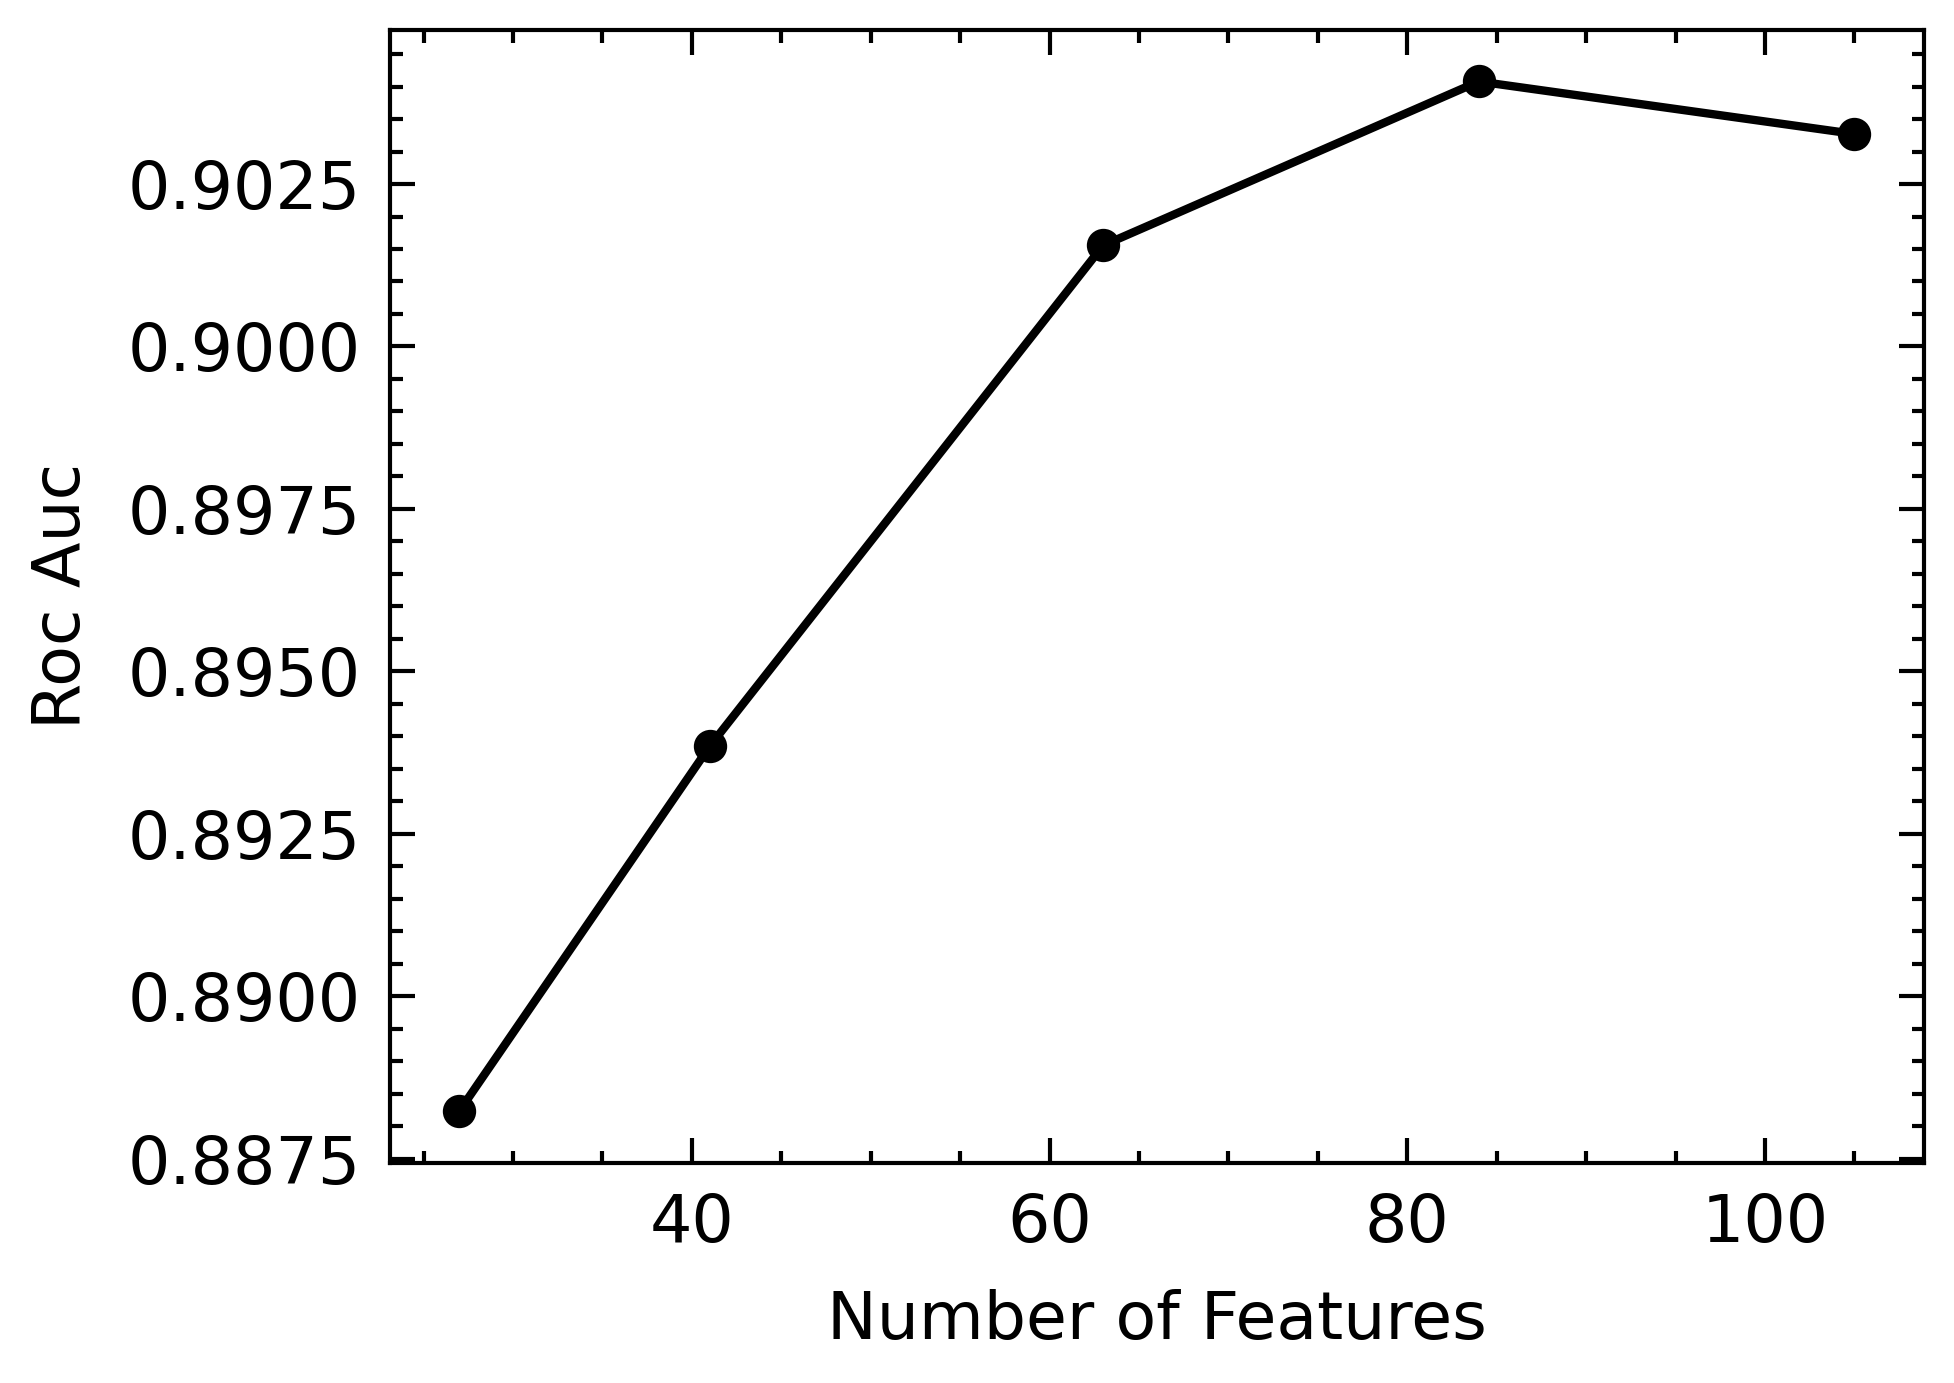

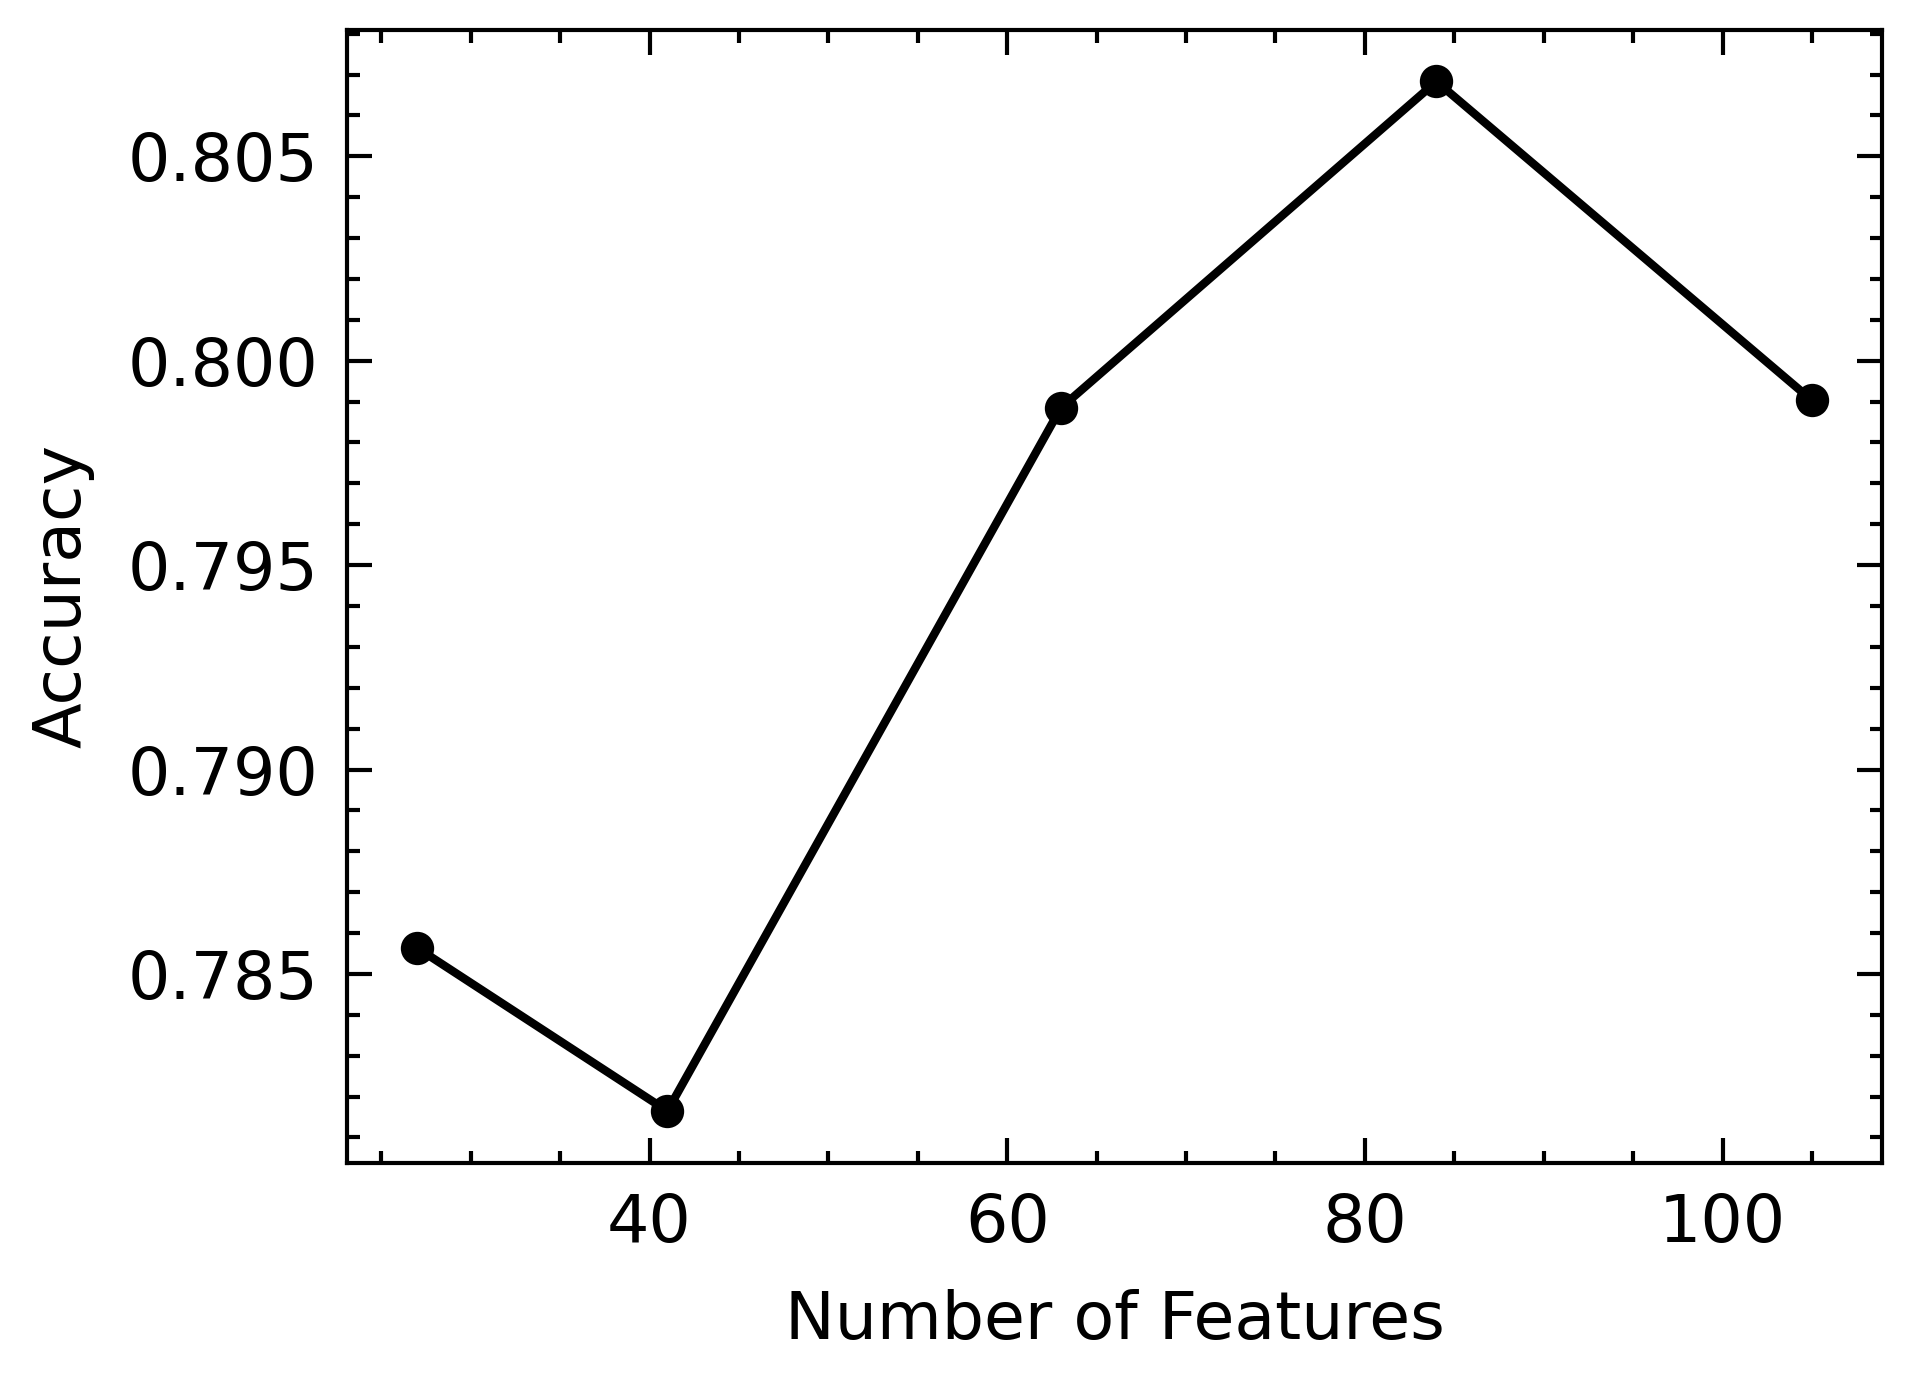

In [15]:
display(Image.open('figures/MLP/nDimsVsRoc Auc.png'))
display(Image.open('figures/MLP/nDimsVsAccuracy.png'))

Many of the metrics follow this pattern. The second to last Number of Features is the best

The best model used the 20 most frequent values in each category for a resulting 84 dimensions after begin one-hot encoded. This model's hyperparameters were:
1. activation = relu
2. alpha = 0.05
3. hidden_later_sizes = (100,) (One hidden layer of size 100)
4. learning_rate = adaptive
5. solver = adam

Here are the training and testing confusion matrices for the best estimator:

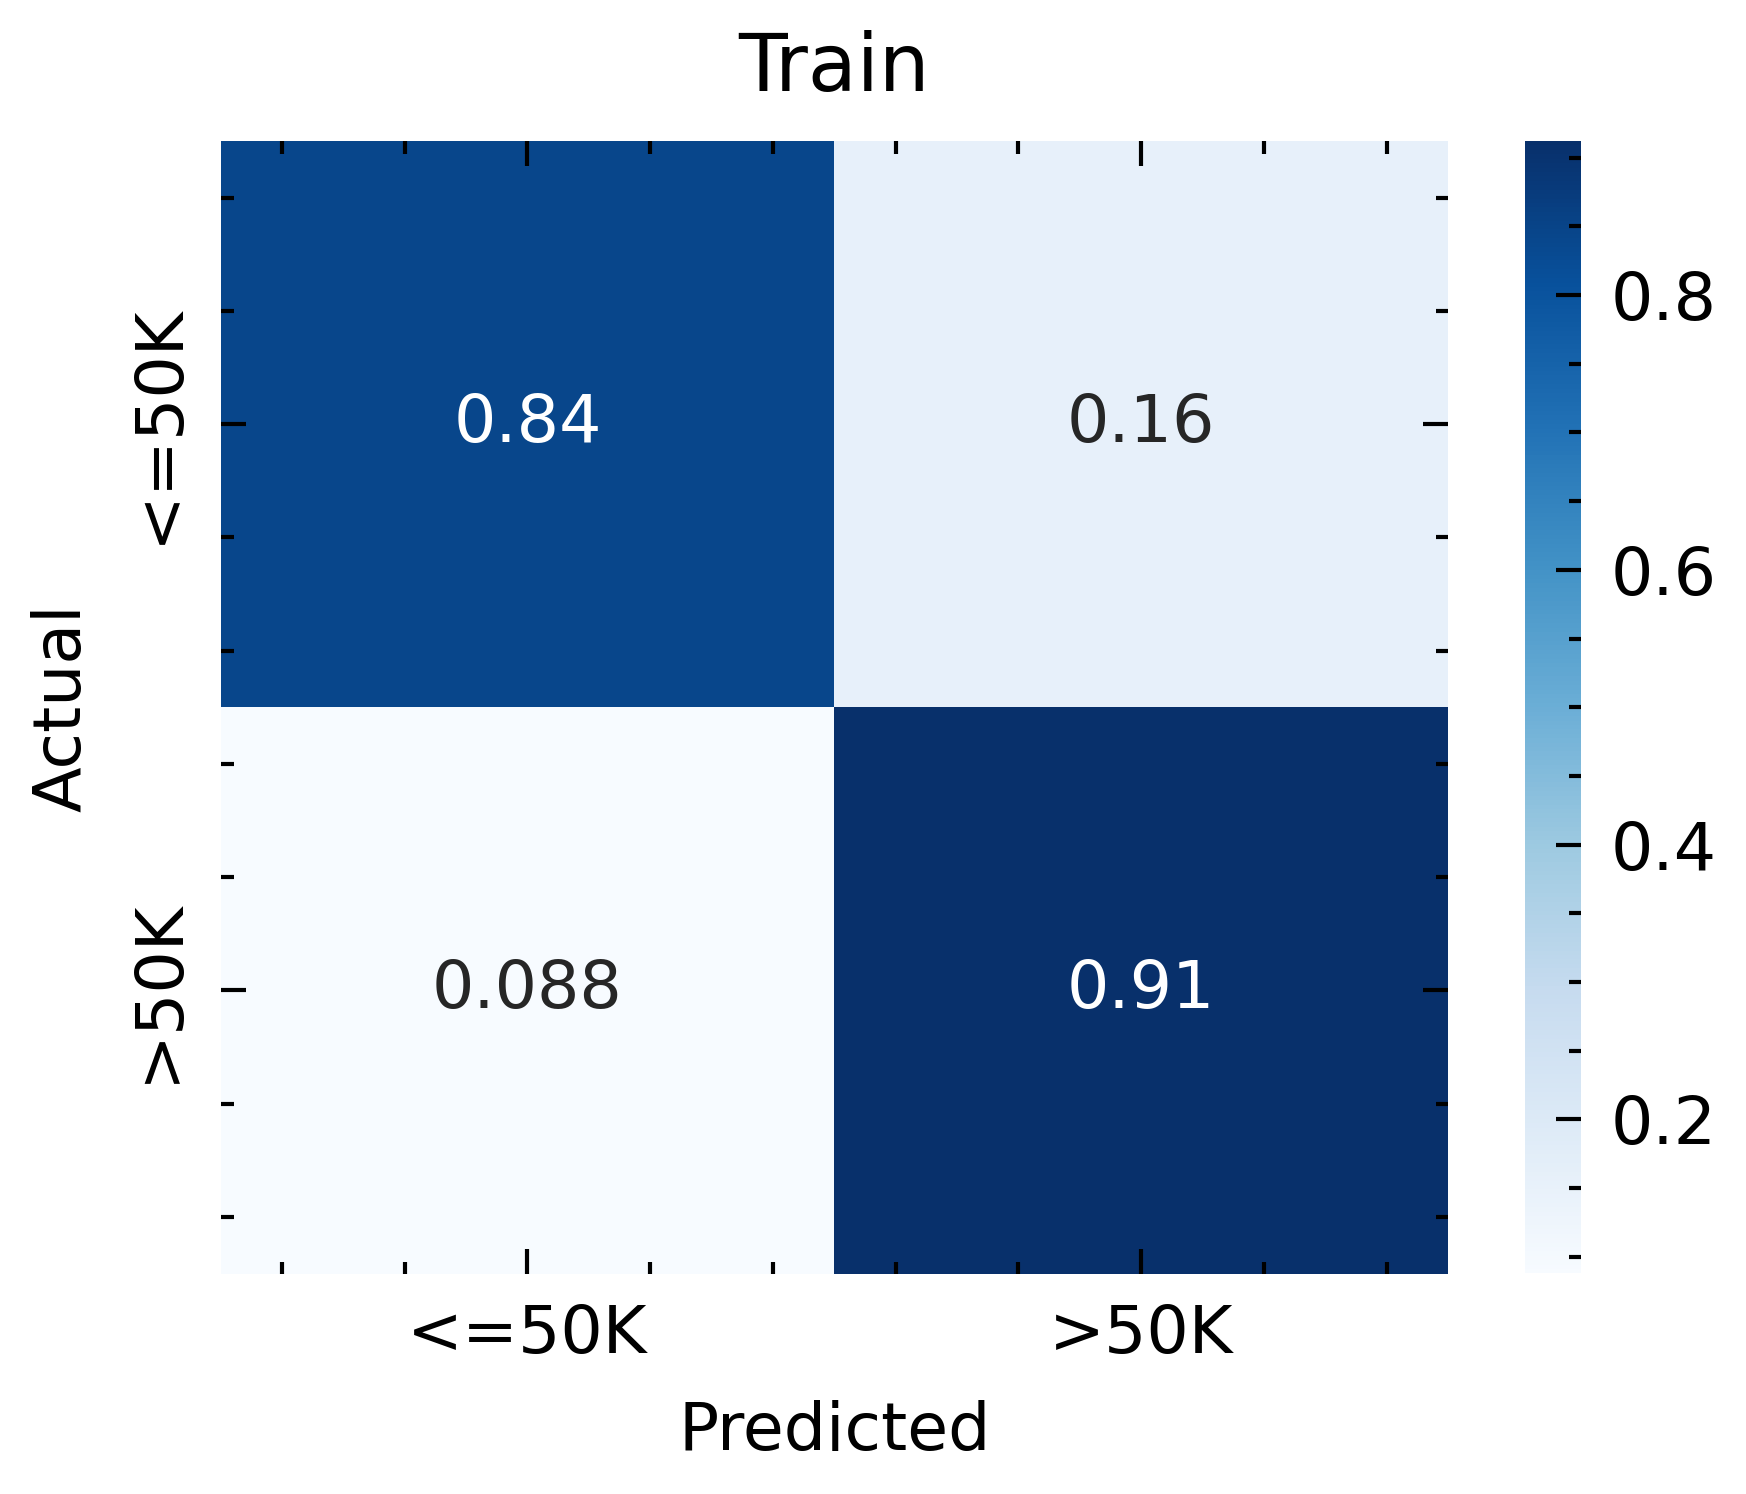

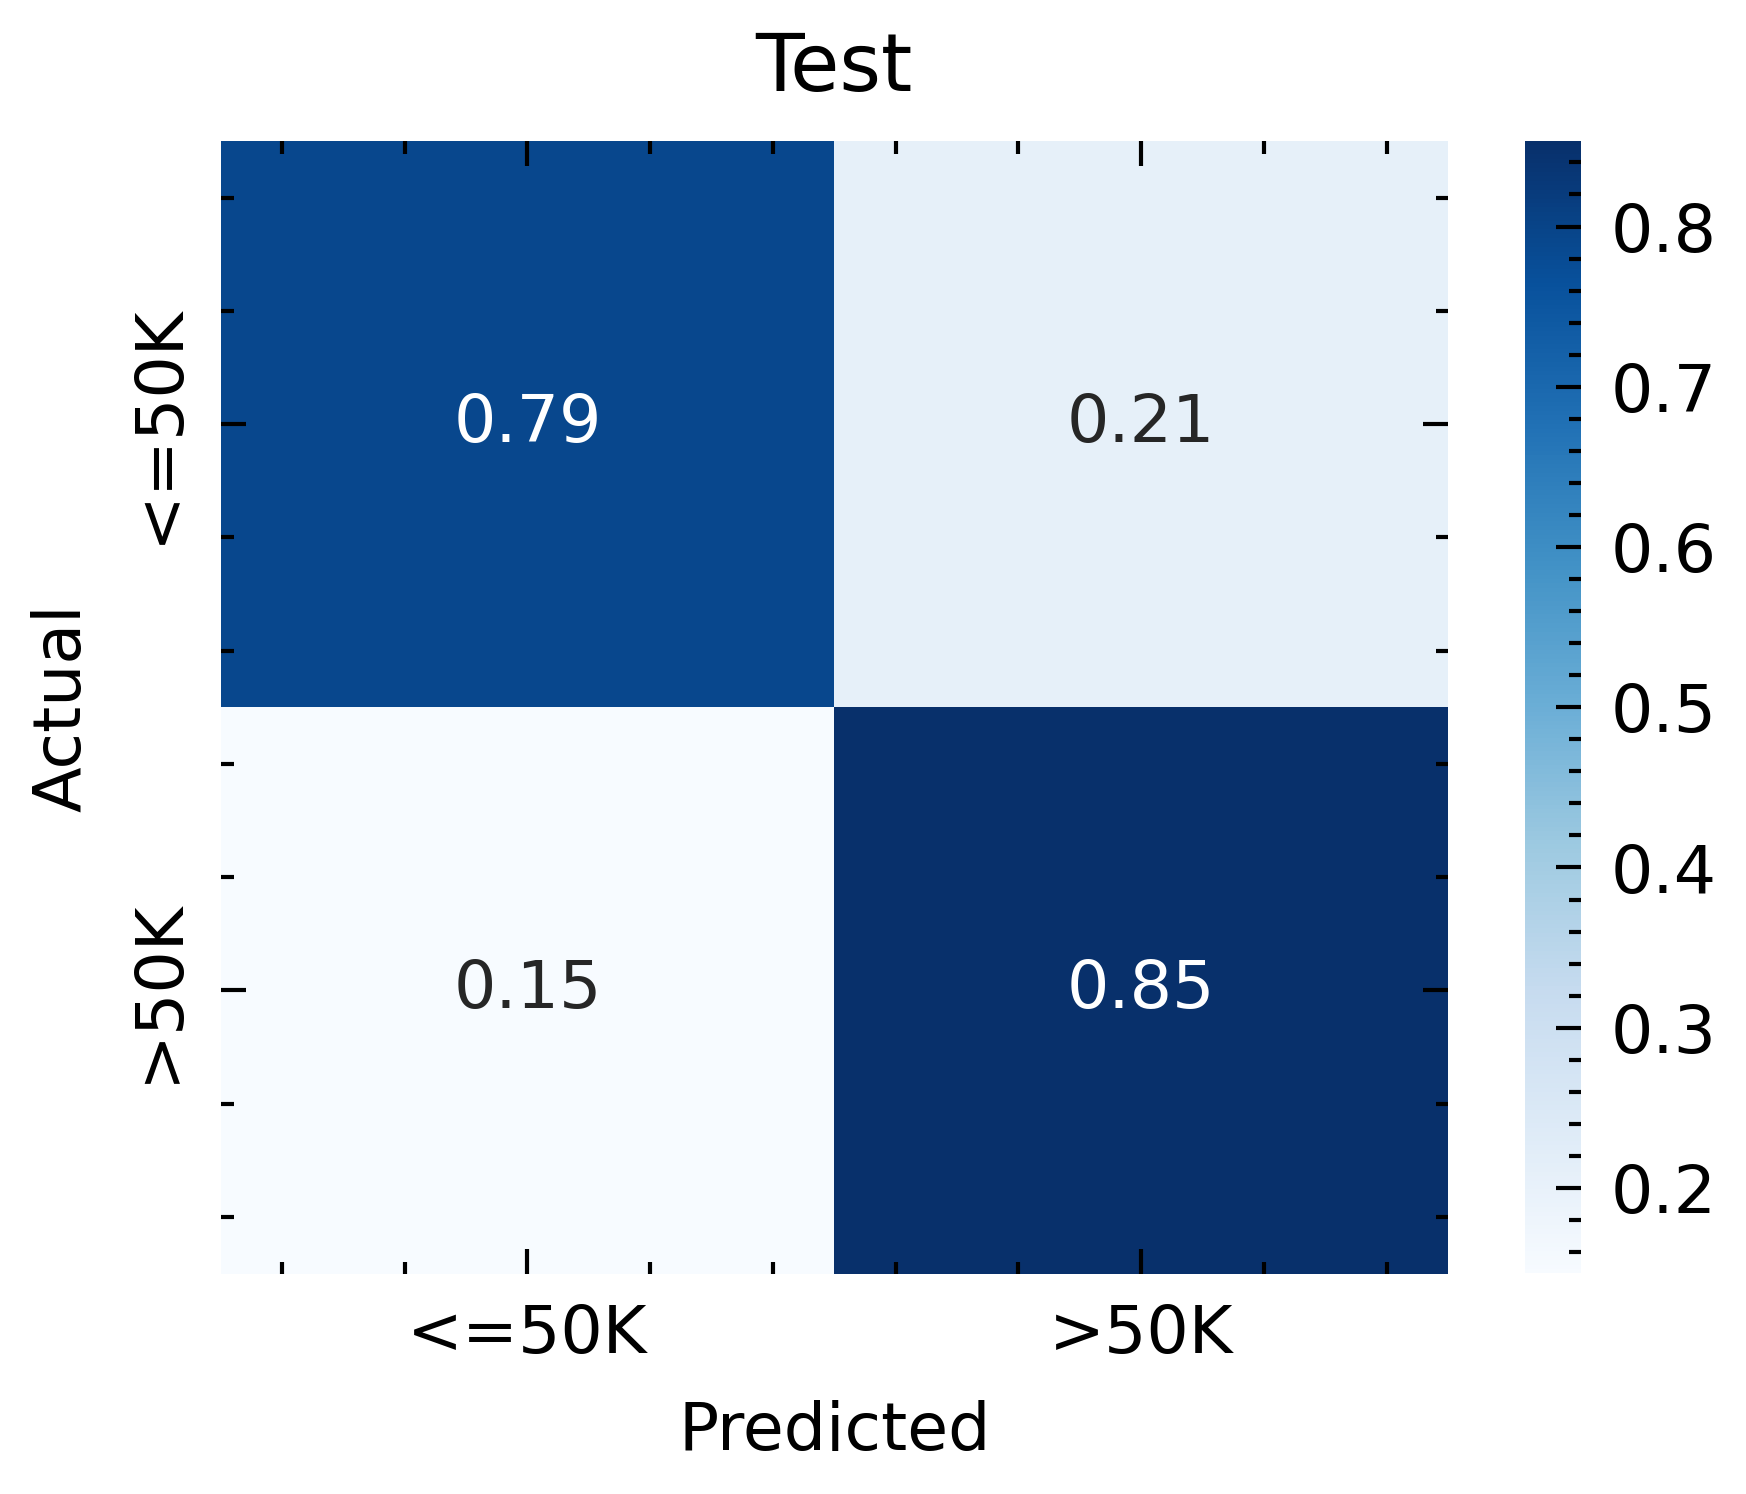

In [16]:
display(Image.open('figures/MLP/TrainConfusionMatrix.png'))
display(Image.open('figures/MLP/TestConfusionMatrix.png'))

A Table of the parameter search for the best set of features (84):

In [17]:
stats = pd.read_pickle('data/MLP_stats.pkl')
stats

mean_test_recall  mean_test_accuracy  \
param_alpha param_hidden_layer_sizes                                         
0.0001      (64, 32, 16)                      0.822473            0.787400   
            (100,)                            0.816350            0.807805   
0.0500      (64, 32, 16)                      0.820300            0.794223   
            (100,)                            0.841216            0.819793   

                                      mean_test_f1  mean_test_precision  \
param_alpha param_hidden_layer_sizes                                      
0.0001      (64, 32, 16)                  0.794385             0.769361   
            (100,)                        0.809255             0.802917   
0.0500      (64, 32, 16)                  0.799242             0.780700   
            (100,)                        0.823319             0.807342   

                                      mean_test_roc_auc  
param_alpha param_hidden_layer_sizes                     
0.0001      (64, 32, 16)                       0.856795  
            (100,)                             0.889863  
0.0500      (64, 32, 16)                       0.870812  
            (100,)                             0.904218